# 1. Preprocessing and Merging

## Business Standard

In [ ]:
import pandas as pd
from datetime import datetime

# Load the CSV file
file_path = 'BS_Auto_news.csv'
df = pd.read_csv(file_path)

# Function to extract and convert the date
def convert_date(date_str):
  # Extract the date part from the string
  date_part = date_str.split('|')[0].replace('Updated On :', '').strip()
  # Convert to datetime object
  date_obj = datetime.strptime(date_part, '%d %b %Y')
  # Return the date in the desired format
  return date_obj.strftime('%Y-%m-%d')

# Apply the function to the 'Date' column
df['Date'] = df['Date'].apply(convert_date)

# Filter the rows between 9 Oct 2023 and 9 Oct 2024
start_date = datetime.strptime('2023-11-10', '%Y-%m-%d')
end_date = datetime.strptime('2024-11-10', '%Y-%m-%d')
df = df[(df['Date'] >= start_date.strftime('%Y-%m-%d')) &
               (df['Date'] <= end_date.strftime('%Y-%m-%d'))]

df = df.drop_duplicates()

# Save the preprocessed data to a new CSV
#df.to_csv('BS_Auto_news_(UnMERGED).csv', index=False)


# Display the filtered DataFrame
print(df)


                                              Headline        Date
13   Toyota to ramp up China production to bring sa...  2024-11-09
14   Auto Expo 2025 to be held under Bharat Mobilit...  2024-11-06
15   Auto retail sales up 32% in Oct as 2W, PVs shi...  2024-11-06
16   Tremendous growth opportunity in India, Apac r...  2024-11-06
17   Hero MotoCorp to expand EV business with new a...  2024-11-06
..                                                 ...         ...
843  Car sales to cross 4 mn mark this year on stro...  2023-11-14
844  Volkswagen to cut administrative personnel cos...  2023-11-13
845  MoRTH proposes installation of inbuilt collisi...  2023-11-11
846  PV wholesales touch all-time high for October ...  2023-11-10
847  Passenger vehicles, 3-wheelers report highest ...  2023-11-10

[835 rows x 2 columns]


## Money Control

In [ ]:
import pandas as pd
from datetime import datetime

# Load the CSV file
file_path = 'MC_Automobile_all30.csv'
df = pd.read_csv(file_path)

# Function to extract and convert the date
def convert_date(date_str):
  # Extract the date part from the string
  date_part = date_str.split(' ')[0:3]  # Get the first three parts (e.g., "November 13, 2024")
  date_part = ' '.join(date_part)  # Join them back into a string
  # Convert to datetime object
  date_obj = datetime.strptime(date_part, '%B %d, %Y')
  # Return the date in the desired format
  return date_obj.strftime('%Y-%m-%d')

# Apply the function to the 'date' column
df['Date'] = df['date'].apply(convert_date)

df.drop(columns=['date'], inplace=True)
df = df.drop_duplicates()

# Filter the rows between 10 Nov 2023 and 10 Nov 2024
start_date = datetime.strptime('2023-11-10', '%Y-%m-%d')
end_date = datetime.strptime('2024-11-10', '%Y-%m-%d')
df = df[(df['Date'] >= start_date.strftime('%Y-%m-%d')) &
               (df['Date'] <= end_date.strftime('%Y-%m-%d'))]

# Replace "€™" with "'" and remove "Â" in the 'headline' column
df['headline'] = df['headline'].str.replace("€™", "'").str.replace("Â", "")

# Save the preprocessed data to a new CSV
#df.to_csv('MC_Automobile_(UnMERGED).csv', index=False)

# Display the filtered DataFrame
print(df)

                                               headline        Date
9     Hope govt will consider incentives for electri...  2024-11-09
10    Tamil Nadu facility to build both Tata Motors ...  2024-11-08
11    Mahindra & Mahindra to debut two new EVs on No...  2024-11-08
12    Despite XUV 4OO’s low volumes, our Born Electr...  2024-11-07
13    M&M facing high demand for Thar Roxx SUV, plan...  2024-11-07
...                                                 ...         ...
1035  MoRTH proposes inbuilt collision warning signa...  2023-11-11
1036  M&M continues to log 51,000 SUV bookings per m...  2023-11-10
1037            Eicher Motors beats Q2 profit estimates  2023-11-10
1038  M&M Q2 Results: Net profit jumps 67% to Rs 3,4...  2023-11-10
1039  Tesla To Enter India By 2024? Piyush Goyal Lik...  2023-11-10

[1031 rows x 2 columns]


## Live Mint

In [ ]:
import pandas as pd
from datetime import datetime

# Load the CSV file with proper encoding
file_path = 'LM_AutoNews.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# Function to extract and convert the date
def convert_date(date_str):
    # Extract the date part from the string
    date_part = date_str.split(',')[0].replace('Updated: ', '').strip()
    # Convert to datetime object
    date_obj = datetime.strptime(date_part, '%d %b %Y')
    # Return the date in the desired format
    return date_obj.strftime('%Y-%m-%d')

# Apply the function to the 'Date & Time' column
df['Date'] = df['Date & Time'].apply(convert_date)

# Filter the rows between 10 Nov 2023 and 10 Nov 2024
start_date = datetime.strptime('2023-11-10', '%Y-%m-%d')
end_date = datetime.strptime('2024-11-10', '%Y-%m-%d')
df = df[(df['Date'] >= start_date.strftime('%Y-%m-%d')) &
        (df['Date'] <= end_date.strftime('%Y-%m-%d'))]

# Replace special characters in 'Headline' using Unicode representations
df['Headline'] = (df['Headline']
                  .str.replace("â€™", "'")   # , regex=False
                  .str.replace("â€˜", "'")
                  .str.replace("â€“", "-")
                  .str.replace("â‚¹", "₹"))

# ------- Additional Preprocessing Steps -------
# 1) Remove leading and trailing double quotes from 'Headline'
df['Headline'] = df['Headline'].str.strip('"')

# 2) Ensure there's a space between words and '₹' symbol if it's missing
# This will insert a space before '₹' if there's a non-space character before it
df['Headline'] = df['Headline'].str.replace(r'(\S)(₹)', r'\1 \2', regex=True)

# Drop unnecessary columns
df = df.drop(columns=['Date & Time'])
df = df.drop_duplicates()

# Save the preprocessed data to a new CSV
#df.to_csv('LM_AutoNews_(UnMERGED).csv', index=False)

# Display the filtered DataFrame
print(df)


                                              Headline        Date
3    Tata Motors sees Q2 profit fall on weak JLR, d...  2024-11-08
4    Kia Clavis teaser suggests bold, RV-inspired d...  2024-11-07
5    M&M raises tractor growth forecast, maintains ...  2024-11-07
6    Mahindra's XEV 9e and BE 6e Electric SUVs set ...  2024-11-07
7    2024 Maruti Suzuki set to launch sleek fourth-...  2024-11-06
..                                                 ...         ...
694  Volvo expands its electric lineup with the EM9...  2023-11-13
695  India considers lowering duty to woo Elon Musk...  2023-11-13
696  From Tata Nexon to Hyundai Verna: Top car laun...  2023-11-11
697  Maruti Suzuki eVX spotted testing in India: Al...  2023-11-11
698  26.21 lakh vehicles sold in Oct 2023, highest ...  2023-11-10

[676 rows x 2 columns]


## Financial Express

In [ ]:
import pandas as pd
import re
from datetime import datetime

# Load the CSV file
file_path = 'FE_Auto_CarNews.csv'  # Replace with your actual file path
df = pd.read_csv(file_path, encoding='utf-8')

# Step 1: Remove rows containing "In Images", "In Pictures", or "No date"
df = df[~df['headline'].str.contains("In Images|In Pictures", na=False)]
df = df[~df['Date & Time'].str.contains("No date", na=False)]

# Step 2: Extract and convert 'Date & Time' to '%Y-%m-%d' format
def extract_date(date_str):
  # Remove 'Updated: ' if present
  date_str = date_str.replace('Updated: ', '')
  # Extract the date part
  date_part = date_str.split(' ')[0:3]  # Get the first three parts (month, day, year)
  date_str = ' '.join(date_part)  # Join them back into a string
  # Convert to datetime and format
  return pd.to_datetime(date_str, format='%B %d, %Y').strftime('%Y-%m-%d')

# Apply the function to the 'Date & Time' column
df['Date'] = df['Date & Time'].apply(extract_date)

# Step 3: Filter rows between 10-11-2023 and 10-11-2024
start_date = '2023-11-10'
end_date = '2024-11-10'

# Convert 'Date' column back to datetime for filtering
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Filter the DataFrame
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].reset_index(drop=True)


# Step 4: Clean the 'headline' column by replacing special characters
# Define replacements
replacements = {
  'â€™': "'",    # Replace with apostrophe
  'â€˜': "'",
  'â€“': '-',    # Replace with hyphen
  'â€”': '-',
  'â€¦': '...',
  'â‚¹': '₹',    # Replace with rupee symbol
  'â€': '',      # Remove unintended characters
  '€': '€',      # Euro symbol (if needed)
}

# Function to replace special characters
def replace_special_chars(text):
  for key, value in replacements.items():
      text = text.replace(key, value)
  return text

# Apply the function to the 'headline' column
df['headline'] = df['headline'].apply(replace_special_chars)

# Optional: Remove leading and trailing double quotes from 'headline'
#df['headline'] = df['headline'].str.strip('"')

df.drop(columns=['Date & Time'], inplace=True)
df = df.drop_duplicates()

# Display the cleaned DataFrame
print(df)

# Save the cleaned DataFrame to a new CSV file
#df.to_csv('FE_Auto_CarNews_(UnMERGED).csv', index=False, encoding='utf-8')

                                               headline       Date
0     Bentley to enter EV class with SUV, launching ... 2024-11-10
1     Dzire to impress: Maruti Suzuki compact sedan ... 2024-11-10
2     Next-gen Toyota Camry Hybrid India launch in e... 2024-11-09
3     Maruti Suzuki unveils the fourth-gen Dzire – A... 2024-11-09
4     Next-gen Renault Duster spied in India for fir... 2024-11-09
...                                                 ...        ...
1406        End of road for Volvo XC40 petrol in India? 2023-11-10
1407  Uber comments on proposed ban on non-Delhi reg... 2023-11-10
1408  Maruti Suzuki Wagon R gets discounts upto Rs 4... 2024-08-06
1409  Toyota Rumion vs Maruti Suzuki Ertiga: Prices,... 2024-08-07
1410  Toyota Innova Hycross is number one hybrid veh... 2024-08-07

[1411 rows x 2 columns]


## India Today

In [ ]:
import pandas as pd
from datetime import datetime

# Load the CSV file
file_path = 'IT_LatestAutoNews_Max.csv'
df = pd.read_csv(file_path)

# Function to convert the date format
def convert_date(date_str):
  # Convert to datetime object
  date_obj = datetime.strptime(date_str, '%Y-%m-%d')
  # Return the date in the desired format
  return date_obj.strftime('%Y-%m-%d')

# Apply the function to the 'Date' column
df['Date'] = df['Date'].apply(convert_date)

# Filter the rows between 10 Nov 2023 and 10 Nov 2024
start_date = datetime.strptime('2023-11-10', '%Y-%m-%d')
end_date = datetime.strptime('2024-11-10', '%Y-%m-%d')
df = df[(df['Date'] >= start_date.strftime('%Y-%m-%d')) &
               (df['Date'] <= end_date.strftime('%Y-%m-%d'))]

# Replace "â€“" with "-" in the 'Headline' column
df['Headline'] = df['Headline'].str.replace("â€“", "-")

df = df.drop_duplicates()

# Save the preprocessed data to a new CSV
#df.to_csv('IT_LatestAutoNews_(UnMERGED).csv', index=False)

# Display the filtered DataFrame
print(df)

                                              Headline        Date
0      Mahindra BE 6e, XEV 9e launch timeline revealed  2024-11-08
1    This tractor maker clocked its best-ever month...  2024-11-07
2    Hyundai fends off Mahindra challenge in Octobe...  2024-11-01
3    No festive cheer for Maruti as sales fall in O...  2024-11-01
4    Mahindra records highest-ever SUV sales in Oct...  2024-11-01
..                                                 ...         ...
313  Pakistan car sales: Industry in shambles with ...  2023-11-15
314  Scorpio drives demand for Mahindra SUVs with h...  2023-11-14
315  Have you downloaded the latest issue of AUTO T...  2023-11-14
316  ED attaches 3 properties of Hero MotoCorp's Pa...  2023-11-13
317  Mahindra Q2 results: Net profit rises 67%, 17%...  2023-11-10

[318 rows x 2 columns]


<ipython-input-124-efe22c94a261>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Headline'] = df['Headline'].str.replace("â€“", "-")


## ET Auto

In [ ]:
import pandas as pd
import re

# Load the CSV file
df = pd.read_csv('ET Auto_PassengerVehicle_Max50.csv', encoding='utf-8')

# Step 1: Convert 'Date' column to '%Y-%m-%d' format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')

# Step 2: Filter rows between 10-11-2023 and 10-11-2024
start_date = '2023-11-10'
end_date = '2024-11-10'

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].reset_index(drop=True)

# Step 3: Clean the 'headline' column

# Define replacements
replacements = {
  'â€™': "'",    # Replace with apostrophe
  'â€˜': "'",
  'â€œ': '"',    # Replace with double quotes
  'â€': '"',
  'â€“': '-',    # Replace with hyphen
  'â€”': '-',
  'â€¦': '...',
  'â‚¹': '₹',    # Replace with rupee symbol
  'â€': '',      # Remove unintended characters
  '€': '€',      # Euro symbol (if needed)
  'Ã—': 'x',
  'Â': '',       # Remove unintended characters
  'Ã©': 'é',
  'Ã ': 'à',
  '“': '"',
  '”': '"',
}

def replace_special_chars(text):
  for key, value in replacements.items():
      text = text.replace(key, value)
  return text

df['headline'] = df['headline'].apply(replace_special_chars)

# Ensure space between words and '₹' symbol
df['headline'] = df['headline'].str.replace(r'(\S)(₹)', r'\1 \2', regex=True)
df['headline'] = df['headline'].str.replace(r'(₹)(\S)', r'\1 \2', regex=True)

# Remove leading and trailing double quotes
df['headline'] = df['headline'].str.strip('"')

df = df.drop_duplicates()

# Save the cleaned DataFrame to a new CSV file
#df.to_csv('ET Auto_PassengerVehicle_(UnMERGED).csv', index=False, encoding='utf-8')

## Merging the headlines with same date

In [ ]:
print(df.columns)

Index(['Headline', 'Date'], dtype='object')


In [ ]:

# Step 1: Drop the 'Time' column as it's not needed
#df = df.drop(columns=['Time'])



# Step 2: Group by 'Date' and merge the 'Headline' column
df_grouped = df.groupby('Date')['headline'].apply(lambda x: '; '.join(x)).reset_index()
df = df_grouped.sort_values(by='Date', ascending=False)



# Save the merged data to a new CSV file
df.to_csv('MC_Automobile_(MERGED).csv', index=False)

# Print the first few rows to verify
print(df.head())


           Date                                           headline
328  2024-11-09  Hope govt will consider incentives for electri...
327  2024-11-08  Tamil Nadu facility to build both Tata Motors ...
326  2024-11-07  Despite XUV 4OO’s low volumes, our Born Electr...
325  2024-11-06  Maruti Suzuki looks to enhance exports with up...
324  2024-11-05  Škoda Kylaq, Maruti Suzuki Dzire, Mahindra XEV...


# 2. FinBERT

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import scipy
import torch

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
# Step 1: Load the merged headlines CSV file
import pandas as pd

file = 'MC_Automobile_(MERGED).csv'  # Change this to your file path
df = pd.read_csv(file)
print(df.head())

         Date                                           headline
0  2024-11-09  Hope govt will consider incentives for electri...
1  2024-11-08  Tamil Nadu facility to build both Tata Motors ...
2  2024-11-07  Despite XUV 4OO’s low volumes, our Born Electr...
3  2024-11-06  Maruti Suzuki looks to enhance exports with up...
4  2024-11-05  Škoda Kylaq, Maruti Suzuki Dzire, Mahindra XEV...


In [ ]:
def finbert_sentiment(text: str) -> tuple[float, float, float, str]:
    with torch.no_grad():
        inputs = tokenizer(
            text, return_tensors="pt", padding=True, truncation=True, max_length=512
        )
        outputs = model(**inputs)
        logits = outputs.logits
        scores = {
            k: v
            for k, v in zip(
                model.config.id2label.values(),
                scipy.special.softmax(logits.numpy().squeeze()),
            )
        }
        return (
            scores["positive"],
            scores["negative"],
            scores["neutral"],
            max(scores, key=scores.get),
        )

In [ ]:
# Notice that this is the raw text, no preprocessing
df[["finbert_pos", "finbert_neg", "finbert_neu", "finbert_sentiment"]] = (
    df["Headline"].apply(finbert_sentiment).apply(pd.Series)    # please check whether it's "Headline" or "headline" in the dataset.
)
df["finbert_score"] = df["finbert_pos"] - df["finbert_neg"]

In [ ]:
df[
    [
        "Date",
        "Headline",   # please check whether it's "Headline" or "headline" in the dataset.
        "finbert_pos",
        "finbert_neg",
        "finbert_neu",
        "finbert_sentiment",
        "finbert_score",
    ]
]

,Date,headline,finbert_pos,finbert_neg,finbert_neu,finbert_sentiment,finbert_score
0,2024-11-09,Hope govt will consider incentives for electri...,0.246453,0.011497,0.742049,neutral,0.234956
1,2024-11-08,Tamil Nadu facility to build both Tata Motors ...,0.263824,0.009084,0.727092,neutral,0.254741
2,2024-11-07,"Despite XUV 4OO’s low volumes, our Born Electr...",0.909834,0.009591,0.080575,positive,0.900243
3,2024-11-06,Maruti Suzuki looks to enhance exports with up...,0.943999,0.014175,0.041826,positive,0.929824
4,2024-11-05,"Škoda Kylaq, Maruti Suzuki Dzire, Mahindra XEV...",0.770835,0.018694,0.210471,positive,0.752141
...,...,...,...,...,...,...,...
324,2023-11-14,Expect momentum building on demand side moving...,0.887251,0.011129,0.101620,positive,0.876122
325,2023-11-13,Challenge global players to invest in India's ...,0.795658,0.007963,0.196379,positive,0.787695
326,2023-11-12,Happy Diwali 2023: Planning to own a car this ...,0.047736,0.020065,0.932199,neutral,0.027671
327,2023-11-11,"250 Duke: A wild child, and yet a sane motorcy...",0.727466,0.009453,0.263081,positive,0.718012


In [ ]:
df.to_csv('MC_Automobile_FinBERT_score.csv', index=False)

## Handling Weekends, Holidays, FinBERT scores and Close price

In [ ]:
import pandas as pd

# Load the datasets
nifty_data_path = 'NIFTY AUTO (1Y).csv'
finbert_data_path = 'MC_Automobile_FinBERT_score.csv'

# Load data into DataFrames
nifty_df = pd.read_csv(nifty_data_path)
finbert_df = pd.read_csv(finbert_data_path)

# Convert 'Date' columns to datetime format (YYYY-MM-DD)
nifty_df['Date'] = pd.to_datetime(nifty_df['Date'], format='%Y-%m-%d')
finbert_df['Date'] = pd.to_datetime(finbert_df['Date'], format='%Y-%m-%d')

# Display the first few rows to confirm successful loading and date conversion
print(nifty_df.head())
print(finbert_df.head())


        Date    Close       Volume
0 2023-11-10  16286.70  44352330.0
1 2023-11-12  16377.05   7184954.0
2 2023-11-13  16365.30  27037348.0
3 2023-11-15  16648.50  43869066.0
4 2023-11-16  16788.90  41826716.0
        Date                                           headline  finbert_pos  \
0 2024-11-09  Hope govt will consider incentives for electri...     0.246453   
1 2024-11-08  Tamil Nadu facility to build both Tata Motors ...     0.263824   
2 2024-11-07  Despite XUV 4OO’s low volumes, our Born Electr...     0.909834   
3 2024-11-06  Maruti Suzuki looks to enhance exports with up...     0.943999   
4 2024-11-05  Škoda Kylaq, Maruti Suzuki Dzire, Mahindra XEV...     0.770835   

   finbert_neg  finbert_neu finbert_sentiment  finbert_score  
0     0.011497     0.742049           neutral       0.234956  
1     0.009084     0.727092           neutral       0.254741  
2     0.009591     0.080575          positive       0.900243  
3     0.014175     0.041826          positive       0.929

In [ ]:
# Define the date range we want to cover
start_date = pd.to_datetime('2023-11-10')
end_date = pd.to_datetime('2024-11-10')
full_date_range = pd.date_range(start=start_date, end=end_date)

# Reindex NIFTY BANK data to include all dates within the range
nifty_df = nifty_df.set_index('Date').reindex(full_date_range).reset_index()
# nifty_df.columns = ['Date', 'Close']

# Correct the column names to match the expected number of columns
nifty_df.columns = ['Date', 'Close', 'Volume']  # Assuming 'Volume' is the third column name, adjust if needed

# Forward-fill 'Close' price for weekends and holidays
nifty_df['Close'] = nifty_df['Close'].ffill()

# Display the result to confirm reindexing and forward-filling
print(nifty_df.head(10))
print(nifty_df.tail(10))


        Date     Close      Volume
0 2023-11-10  16286.70  44352330.0
1 2023-11-11  16286.70         NaN
2 2023-11-12  16377.05   7184954.0
3 2023-11-13  16365.30  27037348.0
4 2023-11-14  16365.30         NaN
5 2023-11-15  16648.50  43869066.0
6 2023-11-16  16788.90  41826716.0
7 2023-11-17  16905.50  45613210.0
8 2023-11-18  16905.50         NaN
9 2023-11-19  16905.50         NaN
          Date    Close      Volume
357 2024-11-01  23805.6   8691645.0
358 2024-11-02  23805.6         NaN
359 2024-11-03  23805.6         NaN
360 2024-11-04  23573.2  68421073.0
361 2024-11-05  23839.6  48008328.0
362 2024-11-06  24137.9  38475204.0
363 2024-11-07  23812.5  47982179.0
364 2024-11-08  23805.2  59204921.0
365 2024-11-09  23805.2         NaN
366 2024-11-10  23805.2         NaN


In [ ]:
# Merge NIFTY BANK data with FinBERT sentiment scores
merged_df = pd.merge(nifty_df, finbert_df[['Date', 'finbert_score']], on='Date', how='left')

# Fill missing 'finbert_score' with 0 for dates that don't have sentiment data
merged_df['finbert_score'] = merged_df['finbert_score'].fillna(0)

# Display the merged data to confirm the join and filling of missing sentiment scores
print(merged_df.head(10))
print(merged_df.tail(10))


        Date     Close      Volume  finbert_score
0 2023-11-10  16286.70  44352330.0       0.914377
1 2023-11-11  16286.70         NaN       0.718012
2 2023-11-12  16377.05   7184954.0       0.027671
3 2023-11-13  16365.30  27037348.0       0.787695
4 2023-11-14  16365.30         NaN       0.876122
5 2023-11-15  16648.50  43869066.0       0.874196
6 2023-11-16  16788.90  41826716.0       0.903664
7 2023-11-17  16905.50  45613210.0       0.905450
8 2023-11-18  16905.50         NaN       0.400493
9 2023-11-19  16905.50         NaN       0.910650
          Date    Close      Volume  finbert_score
357 2024-11-01  23805.6   8691645.0       0.659612
358 2024-11-02  23805.6         NaN       0.000000
359 2024-11-03  23805.6         NaN       0.897081
360 2024-11-04  23573.2  68421073.0       0.062994
361 2024-11-05  23839.6  48008328.0       0.752141
362 2024-11-06  24137.9  38475204.0       0.929824
363 2024-11-07  23812.5  47982179.0       0.900243
364 2024-11-08  23805.2  59204921.0       

In [ ]:
# Add 'weekday' column to identify weekends and weekdays
merged_df['weekday'] = merged_df['Date'].dt.weekday  # Monday=0, ..., Sunday=6

# Detect holidays (weekdays with missing Volume) and print these dates for verification
# A holiday is defined as a weekday (0 to 4) where 'Close' was forward-filled and has missing Volume
holidays = merged_df[(merged_df['weekday'] < 5) & (merged_df['Close'].shift(1) == merged_df['Close'])]
holiday_dates = holidays['Date'].tolist()

# Print detected holidays
print("Detected Holidays:", holiday_dates)

# Forward-fill 'Close' prices for holidays
merged_df['Close'] = merged_df['Close'].ffill()

# Verify 'Close' prices are forward-filled for holidays
print(merged_df.head(10))
print(merged_df.tail(10))


Detected Holidays: [Timestamp('2023-11-14 00:00:00'), Timestamp('2023-11-27 00:00:00'), Timestamp('2023-12-25 00:00:00'), Timestamp('2024-01-22 00:00:00'), Timestamp('2024-01-26 00:00:00'), Timestamp('2024-03-08 00:00:00'), Timestamp('2024-03-25 00:00:00'), Timestamp('2024-03-29 00:00:00'), Timestamp('2024-04-11 00:00:00'), Timestamp('2024-04-17 00:00:00'), Timestamp('2024-05-01 00:00:00'), Timestamp('2024-05-20 00:00:00'), Timestamp('2024-06-17 00:00:00'), Timestamp('2024-07-17 00:00:00'), Timestamp('2024-08-15 00:00:00'), Timestamp('2024-10-02 00:00:00')]
        Date     Close      Volume  finbert_score  weekday
0 2023-11-10  16286.70  44352330.0       0.914377        4
1 2023-11-11  16286.70         NaN       0.718012        5
2 2023-11-12  16377.05   7184954.0       0.027671        6
3 2023-11-13  16365.30  27037348.0       0.787695        0
4 2023-11-14  16365.30         NaN       0.876122        1
5 2023-11-15  16648.50  43869066.0       0.874196        2
6 2023-11-16  16788.90 

In [ ]:
# Step 5: Adjust finbert_score for weekends, holiday Mondays, regular Mondays, and other weekday holidays

# Calculate sentiment adjustments for weekends and holidays, setting scores to zero only after averaging

# Part A: Adjust holiday Mondays
for i in range(1, len(merged_df) - 2):
    # Check if Monday is a holiday with a non-zero finbert_score
    if merged_df.loc[i, 'weekday'] == 0 and merged_df.loc[i, 'Date'] in holiday_dates and merged_df.loc[i, 'finbert_score'] != 0:
        # Retrieve scores of Saturday and Sunday without setting them to zero yet
        saturday_score = merged_df.loc[i - 2, 'finbert_score'] if merged_df.loc[i - 2, 'weekday'] == 5 else 0
        sunday_score = merged_df.loc[i - 1, 'finbert_score'] if merged_df.loc[i - 1, 'weekday'] == 6 else 0
        tuesday_idx = i + 1  # Tuesday follows Monday

        # Calculate average based on available weekend scores
        if saturday_score > 0 and sunday_score > 0:
            weekend_avg = (saturday_score + sunday_score) / 2
            monday_tuesday_avg = (weekend_avg + merged_df.loc[i, 'finbert_score']) / 2
            final_avg = (monday_tuesday_avg + merged_df.loc[tuesday_idx, 'finbert_score']) / 2
            merged_df.loc[tuesday_idx, 'finbert_score'] = final_avg

        elif saturday_score > 0 or sunday_score > 0:
            weekend_score = max(saturday_score, sunday_score)
            monday_tuesday_avg = (weekend_score + merged_df.loc[i, 'finbert_score']) / 2
            final_avg = (monday_tuesday_avg + merged_df.loc[tuesday_idx, 'finbert_score']) / 2
            merged_df.loc[tuesday_idx, 'finbert_score'] = final_avg

        else:  # Both weekend scores are zero
            final_avg = (merged_df.loc[i, 'finbert_score'] + merged_df.loc[tuesday_idx, 'finbert_score']) / 2
            merged_df.loc[tuesday_idx, 'finbert_score'] = final_avg

        # Set holiday Monday's score to 0 after averaging
        merged_df.loc[i, 'finbert_score'] = 0

# Part B: Adjust non-Monday weekday holidays (e.g., Thursday)
for i in range(len(merged_df) - 1):
    # Check if the holiday is a weekday other than Monday
    if merged_df.loc[i, 'weekday'] in [1, 2, 3, 4] and merged_df.loc[i, 'Date'] in holiday_dates:
        # If holiday has a non-zero score, calculate the average with the next day
        if merged_df.loc[i, 'finbert_score'] != 0:
            next_day_idx = i + 1
            avg_score = (merged_df.loc[i, 'finbert_score'] + merged_df.loc[next_day_idx, 'finbert_score']) / 2
            merged_df.loc[next_day_idx, 'finbert_score'] = avg_score

            # Set holiday's score to 0 only after averaging
            merged_df.loc[i, 'finbert_score'] = 0

# Part C: Adjust regular Mondays (non-holiday) if the initial finbert_score is zero
for i in range(1, len(merged_df) - 2):
    # Check if Monday is a regular day (not in holiday list) and has an initial finbert_score of zero
    if merged_df.loc[i, 'weekday'] == 0 and merged_df.loc[i, 'Date'] not in holiday_dates and merged_df.loc[i, 'finbert_score'] == 0:
        # Retrieve scores of Saturday and Sunday
        saturday_score = merged_df.loc[i - 2, 'finbert_score'] if merged_df.loc[i - 2, 'weekday'] == 5 else 0
        sunday_score = merged_df.loc[i - 1, 'finbert_score'] if merged_df.loc[i - 1, 'weekday'] == 6 else 0

        # Apply the rules for setting Monday's score based on weekend scores
        if saturday_score > 0 and sunday_score > 0:  # Both Saturday and Sunday have non-zero scores
            merged_df.loc[i, 'finbert_score'] = (saturday_score + sunday_score) / 2
        elif saturday_score > 0 or sunday_score > 0:  # Only one of Saturday or Sunday has a non-zero score
            merged_df.loc[i, 'finbert_score'] = max(saturday_score, sunday_score)
        # If both scores are zero, leave Monday's score as zero (no change needed)

# Part D: Finally, set 'finbert_score' to 0 for Saturdays and Sundays after calculating any needed averages
merged_df.loc[merged_df['weekday'].isin([5, 6]), 'finbert_score'] = 0

# Display result to verify adjustments for weekends, holiday Mondays, and regular Mondays
print(merged_df.head(10))
print(merged_df.tail(10))


        Date     Close      Volume  finbert_score  weekday
0 2023-11-10  16286.70  44352330.0       0.914377        4
1 2023-11-11  16286.70         NaN       0.000000        5
2 2023-11-12  16377.05   7184954.0       0.000000        6
3 2023-11-13  16365.30  27037348.0       0.787695        0
4 2023-11-14  16365.30         NaN       0.000000        1
5 2023-11-15  16648.50  43869066.0       0.875159        2
6 2023-11-16  16788.90  41826716.0       0.903664        3
7 2023-11-17  16905.50  45613210.0       0.905450        4
8 2023-11-18  16905.50         NaN       0.000000        5
9 2023-11-19  16905.50         NaN       0.000000        6
          Date    Close      Volume  finbert_score  weekday
357 2024-11-01  23805.6   8691645.0       0.659612        4
358 2024-11-02  23805.6         NaN       0.000000        5
359 2024-11-03  23805.6         NaN       0.000000        6
360 2024-11-04  23573.2  68421073.0       0.062994        0
361 2024-11-05  23839.6  48008328.0       0.752141 

In [ ]:
# Filter the data to keep only the specified date range
merged_df = merged_df[(merged_df['Date'] >= '2023-11-10') & (merged_df['Date'] <= '2024-11-10')]

# Drop the 'weekday' column and reset index for a clean output
merged_df = merged_df.drop(columns=['weekday']).reset_index(drop=True)

# Save the cleaned and processed DataFrame to a CSV file
output_path = 'MC_Automobile_FINAL.csv'
merged_df.to_csv(output_path, index=False)

# Display a confirmation and the first few rows of the final dataset
print("Data processing complete. Processed file saved as:", output_path)
print(merged_df.head())
print(merged_df.tail())


Data processing complete. Processed file saved as: MC_Automobile_FINAL.csv
        Date     Close      Volume  finbert_score
0 2023-11-10  16286.70  44352330.0       0.914377
1 2023-11-11  16286.70         NaN       0.000000
2 2023-11-12  16377.05   7184954.0       0.000000
3 2023-11-13  16365.30  27037348.0       0.787695
4 2023-11-14  16365.30         NaN       0.000000
          Date    Close      Volume  finbert_score
362 2024-11-06  24137.9  38475204.0       0.929824
363 2024-11-07  23812.5  47982179.0       0.900243
364 2024-11-08  23805.2  59204921.0       0.254741
365 2024-11-09  23805.2         NaN       0.000000
366 2024-11-10  23805.2         NaN       0.000000


# Final Merging
## This step includes merging all the 'FINAL' datasets to take the average of the finbert_score

In [ ]:
import pandas as pd
import glob

# List of dataset paths (Change it according to the name of the dataset)
dataset_paths = glob.glob('*_FINAL.csv')  # This will match all files ending with '_FINAL.csv'

# Define the complete date range
start_date = '2023-11-10'
end_date = '2024-11-10'
full_date_range = pd.date_range(start=start_date, end=end_date)

# Load each dataset, attempt date format conversion, align with full date range, and fill missing scores with 0
preprocessed_datasets = []

for path in dataset_paths:
    df = pd.read_csv(path, usecols=['Date', 'Close', 'finbert_score'])  # Include 'Close' column

    # Standardize 'Date' to YYYY-MM-DD by trying both possible formats
    try:
        df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
    except ValueError:
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

    # Reindex to the full date range, ensuring all dates are covered
    df = df.set_index('Date').reindex(full_date_range).reset_index()
    df.columns = ['Date', 'Close', 'finbert_score']  # Rename columns after reindexing
    df['finbert_score'] = df['finbert_score'].fillna(0)  # Fill missing finbert_score with 0
    preprocessed_datasets.append(df)

# Merge datasets by 'Date' column, keeping 'Close' from the first dataset
merged_df = preprocessed_datasets[0]

for i, df in enumerate(preprocessed_datasets[1:], start=2):
    # Merge on 'Date' and 'Close', using suffixes for finbert_score
    merged_df = pd.merge(merged_df, df[['Date', 'finbert_score']], on='Date', how='outer', suffixes=('', f'_{i}'))
    # Fill missing 'finbert_score' with 0 after each merge
    merged_df[f'finbert_score_{i}'] = merged_df[f'finbert_score_{i}'].fillna(0)

# Rename initial finbert_score column to maintain consistency
merged_df = merged_df.rename(columns={'finbert_score': 'finbert_score_1'})

# Function to calculate the average of non-zero scores, returning 0 if all are zero
def average_non_zero(scores):
    non_zero_scores = [score for score in scores if score != 0]
    return sum(non_zero_scores) / len(non_zero_scores) if non_zero_scores else 0

# Apply the averaging function row-wise across the finbert_score columns
score_columns = [col for col in merged_df.columns if 'finbert_score' in col]
merged_df['average_finbert_score'] = merged_df[score_columns].apply(average_non_zero, axis=1)

# Final check: Display a sample of the merged and averaged data
print("Final Averaged finbert_score Preview:")
print(merged_df[['Date', 'average_finbert_score', 'Close']].head(10)) # 'Close' should now be available
print(merged_df[['Date', 'average_finbert_score', 'Close']].tail(10))

# Save the final output to a CSV file
merged_df[['Date', 'average_finbert_score', 'Close']].to_csv('Bank_Final.csv', index=False)

Final Averaged finbert_score Preview:
        Date  average_finbert_score     Close
0 2023-11-10               0.147722  43820.10
1 2023-11-11               0.000000  43820.10
2 2023-11-12               0.000000  43996.65
3 2023-11-13              -0.863312  43891.25
4 2023-11-14               0.000000  43891.25
5 2023-11-15               0.345287  44201.70
6 2023-11-16              -0.395231  44161.55
7 2023-11-17               0.403961  43583.95
8 2023-11-18               0.000000  43583.95
9 2023-11-19               0.000000  43583.95
          Date  average_finbert_score     Close
357 2024-11-01              -0.079861  51673.90
358 2024-11-02               0.000000  51673.90
359 2024-11-03               0.000000  51673.90
360 2024-11-04              -0.279136  51215.25
361 2024-11-05              -0.142484  52207.25
362 2024-11-06               0.335029  52317.40
363 2024-11-07               0.211528  51916.50
364 2024-11-08               0.292331  51561.20
365 2024-11-09          

#BiLSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
merged_df = pd.read_csv('Bank_Final.csv', parse_dates=['Date'])

In [ ]:
def create_lag_features(df, lag_days=1):
    df_lagged = df.copy()
    for lag in range(1, lag_days + 1):
        df_lagged[f'Close_lag_{lag}'] = df_lagged['Close'].shift(lag)
    return df_lagged

# Create 3 lag features for Close prices (e.g., t-1, t-2, t-3)
lag_days = 3
data = create_lag_features(merged_df, lag_days=lag_days)

# Drop any rows with NaN values (because of shifting)
data.dropna(inplace=True)

# Step 2: Split data into train and test sets
train_df = data[:-20]  # Train on everything except the last 20 days
test_df = data[-20:]   # Last 20 days for testing

# Step 3: Normalize the features
# Fit the scaler on the 'Close' prices and 'finbert_score' from training data
# scaler = MinMaxScaler()

## Fit the scaler on the features from training data and transform both training and test data

# List of features (including lag features and 'finbert_score')
features = ['Close']        # + [f'Close_lag_{i}' for i in range(1, lag_days + 1)] + ['average_finbert_score']

# Normalize both training and test data (X)
scaler_X = MinMaxScaler()  # Separate scaler for features
X_train = scaler_X.fit_transform(train_df[features])
X_test = scaler_X.transform(test_df[features])


# Normalize the target variable (y), which is the 'Close' price
# Separate scalers for target variables
scaler_y = MinMaxScaler()  # Separate scaler for target (Close prices)
y_train = scaler_y.fit_transform(train_df[['Close']])
y_test = scaler_y.transform(test_df[['Close']])


# Step 4: Reshape the data for LSTM
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError

def create_bilstm_model(units, dropout_rate):
    model = Sequential()
    model.add(Input(shape=(1, X_train.shape[1])))  # Input layer with correct input shape
    model.add(Bidirectional(LSTM(units, return_sequences=False)))  # BiLSTM layer
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer for price prediction
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[
            MeanAbsoluteError(name='mae'),
            RootMeanSquaredError(name='rmse')
        ])  # MSE for regression
    return model

# Step 5: Train the BiLSTM model
bilstm_model = create_bilstm_model(units=150, dropout_rate=0.1)
history = bilstm_model.fit(X_train_lstm, y_train, epochs=250,
                           batch_size=16, validation_data=(X_test_lstm, y_test), verbose=2)


Epoch 1/250
22/22 - 5s - 224ms/step - loss: 0.1897 - mae: 0.3815 - rmse: 0.4356 - val_loss: 0.1850 - val_mae: 0.4290 - val_rmse: 0.4301
Epoch 2/250
22/22 - 1s - 36ms/step - loss: 0.0450 - mae: 0.1702 - rmse: 0.2121 - val_loss: 0.0189 - val_mae: 0.1356 - val_rmse: 0.1376
Epoch 3/250
22/22 - 0s - 10ms/step - loss: 0.0173 - mae: 0.1131 - rmse: 0.1317 - val_loss: 0.0059 - val_mae: 0.0742 - val_rmse: 0.0769
Epoch 4/250
22/22 - 0s - 15ms/step - loss: 0.0145 - mae: 0.1030 - rmse: 0.1203 - val_loss: 0.0095 - val_mae: 0.0954 - val_rmse: 0.0972
Epoch 5/250
22/22 - 0s - 10ms/step - loss: 0.0117 - mae: 0.0924 - rmse: 0.1080 - val_loss: 0.0066 - val_mae: 0.0797 - val_rmse: 0.0813
Epoch 6/250
22/22 - 0s - 12ms/step - loss: 0.0089 - mae: 0.0808 - rmse: 0.0944 - val_loss: 0.0049 - val_mae: 0.0686 - val_rmse: 0.0699
Epoch 7/250
22/22 - 0s - 14ms/step - loss: 0.0068 - mae: 0.0698 - rmse: 0.0824 - val_loss: 0.0037 - val_mae: 0.0601 - val_rmse: 0.0612
Epoch 8/250
22/22 - 0s - 13ms/step - loss: 0.0048 - ma

In [ ]:
print(bilstm_model.metrics_names)


['loss', 'compile_metrics']


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Train MSE: 1165.2364327666235, Test MSE: 2140.36641329945
Train MAE: 30.183973019622922, Test MAE: 46.162148437498765
Train RMSE: 34.135559652166584, Test RMSE: 46.26409421246081
Train R2: 0.999827507854569, Test R2: 0.9892549103731733


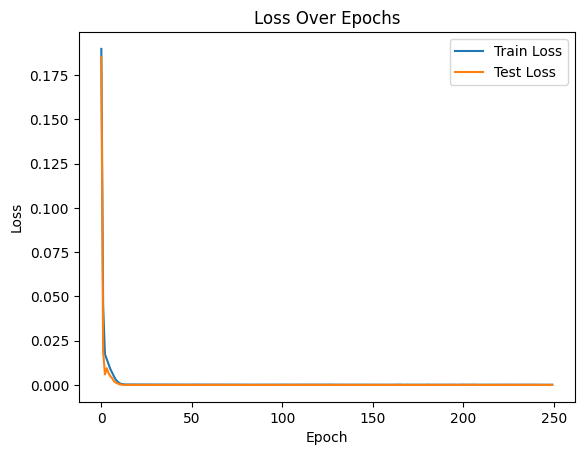

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Step 6: Make predictions
train_predictions = bilstm_model.predict(X_train_lstm)
test_predictions = bilstm_model.predict(X_test_lstm)

# Step 7: Rescale the predictions and actual values back to the original scale
# Use `scaler_y` for inverse transformation of the target variable (Close prices)
train_predictions_rescaled = scaler_y.inverse_transform(train_predictions)
test_predictions_rescaled = scaler_y.inverse_transform(test_predictions)

# Also rescale the actual values (target values) back to the original scale
y_train_rescaled = scaler_y.inverse_transform(y_train)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Step 8: Calculate performance metrics on rescaled data
mse_train = mean_squared_error(y_train_rescaled, train_predictions_rescaled)
mse_test = mean_squared_error(y_test_rescaled, test_predictions_rescaled)
mae_train = mean_absolute_error(y_train_rescaled, train_predictions_rescaled)
mae_test = mean_absolute_error(y_test_rescaled, test_predictions_rescaled)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train_rescaled, train_predictions_rescaled)
r2_test = r2_score(y_test_rescaled, test_predictions_rescaled)

# Print performance metrics
print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Train MAE: {mae_train}, Test MAE: {mae_test}")
print(f"Train RMSE: {rmse_train}, Test RMSE: {rmse_test}")
print(f"Train R2: {r2_train}, Test R2: {r2_test}")

# Step 9: Plot loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

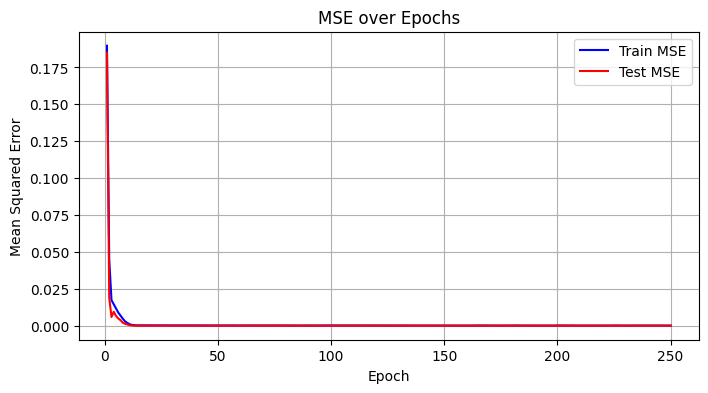

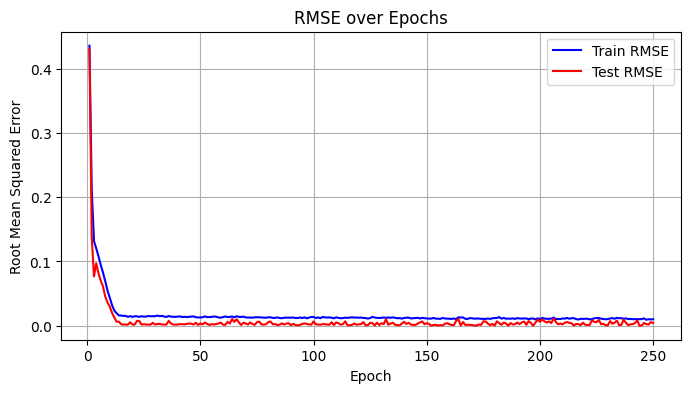

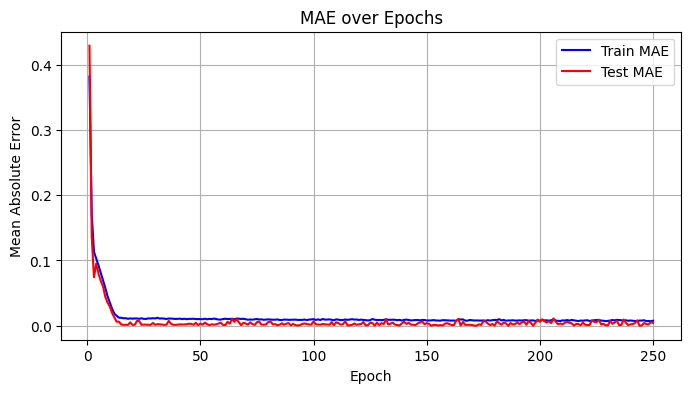

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# pull out metrics from your history
train_mse = history.history['loss']
test_mse  = history.history['val_loss']
train_rmse = history.history['rmse']
test_rmse  = history.history['val_rmse']
train_mae = history.history['mae']
test_mae  = history.history['val_mae']

epochs = range(1, len(train_mse) + 1)

# 1️⃣ Plot MSE
plt.figure(figsize=(8,4))
plt.plot(epochs, train_mse, 'b-',  label='Train MSE')
plt.plot(epochs, test_mse,  'r-', label='Test MSE')
plt.title('MSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# 2️⃣ Plot RMSE
plt.figure(figsize=(8,4))
plt.plot(epochs, train_rmse, 'b-',  label='Train RMSE')
plt.plot(epochs, test_rmse,  'r-', label='Test RMSE')
plt.title('RMSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# 3️⃣ Plot MAE
plt.figure(figsize=(8,4))
plt.plot(epochs, train_mae, 'b-',  label='Train MAE')
plt.plot(epochs, test_mae,  'r-', label='Test MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


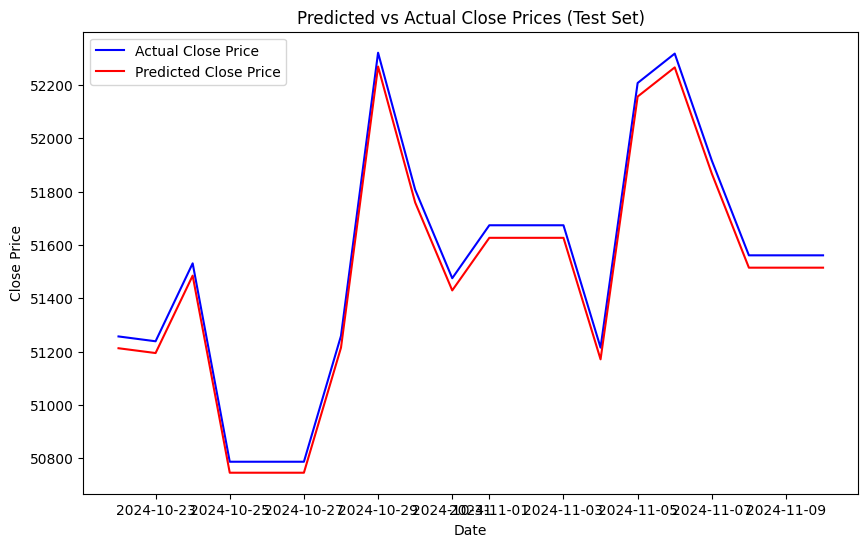

In [ ]:
# Step 10: Plot predictions vs actual for last 20 days
plt.figure(figsize=(10,6))
plt.plot(test_df['Date'], y_test_rescaled, label='Actual Close Price', color='blue')
plt.plot(test_df['Date'], test_predictions_rescaled, label='Predicted Close Price', color='red')
plt.title('Predicted vs Actual Close Prices (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Date': test_df['Date'],
    'Actual Close Price': y_test_rescaled.flatten(),
    'Predicted Close Price': test_predictions_rescaled.flatten()
})

# Calculate the difference between actual and predicted close prices
comparison_df['Difference'] = comparison_df['Predicted Close Price'] - comparison_df['Actual Close Price']

# Print the actual vs. predicted close prices and the difference for the last 20 days
print(comparison_df)

# Optionally, save it to a CSV file
comparison_df.to_csv('actual_vs_predicted_close_prices.csv', index=False)



          Date  Actual Close Price  Predicted Close Price  Difference
347 2024-10-22            51257.15           51212.906250  -44.243750
348 2024-10-23            51239.00           51194.878906  -44.121094
349 2024-10-24            51531.15           51485.062500  -46.087500
350 2024-10-25            50787.45           50746.265625  -41.184375
351 2024-10-26            50787.45           50746.265625  -41.184375
352 2024-10-27            50787.45           50746.265625  -41.184375
353 2024-10-28            51259.30           51215.042969  -44.257031
354 2024-10-29            52320.70           52268.949219  -51.750781
355 2024-10-30            51807.50           51759.488281  -48.011719
356 2024-10-31            51475.35           51429.640625  -45.709375
357 2024-11-01            51673.90           51626.824219  -47.075781
358 2024-11-02            51673.90           51626.824219  -47.075781
359 2024-11-03            51673.90           51626.824219  -47.075781
360 2024-11-04      

In [ ]:
# Threshold-based accuracy:
# In this case, it would calculate the percentage of predictions that fall within 5% of the actual close price.


def calculate_accuracy(y_true, y_pred, threshold=0.05):
    # Calculate the absolute percentage error
    percentage_error = np.abs((y_true - y_pred) / y_true)
    # Count how many predictions fall within the threshold
    accuracy = np.mean(percentage_error <= threshold) * 100
    return accuracy

# Calculate accuracy for the test set (last 20 days) with a 5% threshold
accuracy_test = calculate_accuracy(y_test_rescaled, test_predictions_rescaled, threshold=0.01)
print(f"Test Accuracy within 1% error: {accuracy_test:.2f}%")


Test Accuracy within 1% error: 100.00%


In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)

tr_mape = np.mean(np.abs((y_train_rescaled - train_predictions_rescaled) / y_train_rescaled)) * 100
print(f"Train MAPE: {tr_mape:.3f}%")
tr_acc= 1-tr_mape
print(f"Train Accuracy: {tr_acc:.3f}%")

mape = np.mean(np.abs((y_test_rescaled - test_predictions_rescaled) / y_test_rescaled)) * 100
print(f"Test MAPE: {mape:.3f}%")
acc= 1-mape
print(f"Test Accuracy: {acc:.3f}")



Train MAPE: 0.060%
Train Accuracy: 0.940%
Test MAPE: 0.090%
Test Accuracy: 0.910
